In [144]:
from urllib.parse import urlencode, urlparse
import requests
import math
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [145]:
#получаем ссылку для получения токена
AUTHORIZE_URL = 'https://oauth.vk.com/authorize'
VERSION = '5.63'
APP_ID = 5854786

auth_data = {
    'client_id': APP_ID,
    'display': 'mobile',
    'response_type': 'token',
    'scope': 'friends, groups',
    'v': VERSION,
}

print('?'.join((AUTHORIZE_URL, urlencode(auth_data))))

https://oauth.vk.com/authorize?client_id=5854786&display=mobile&response_type=token&scope=friends%2C+groups&v=5.63


In [146]:
# Переходим по полученной ссылке и копируем ее в строку "token_url"
token_url = #в даннуя сроку 
# вводим id пользователя, по которому будем искать информацию
need_id = # id пищем сюда

o = urlparse(token_url)
fragments = dict((i.split('=') for i in o.fragment.split('&')))
access_token = fragments['access_token']


params = {'access_token': access_token,
          'user_id' : need_id,
          'v': VERSION}


response = requests.get('https://api.vk.com/method/friends.get', params)

In [147]:
# получаем друзей пользователя
friends = response.json()['response']['items']

In [148]:
params_for_follovers = {'access_token': access_token,
          'user_id' : need_id,
          'count' : 1000,              
          'v': VERSION}


response_follover = requests.get('https://api.vk.com/method/users.getFollowers', params_for_follovers)

In [149]:
# получаем всех подписчиков пользователя
follovers = response_follover.json()['response']['items']
response_count_follover = response_follover.json()['response']['count']
count_step = math.ceil(response_count_follover/1000)

In [150]:
offset = 0
if(count_step>1):
    while(count_step>1):
        count_step = count_step - 1
        offset += 1000
        params_for_follovers = {'access_token': access_token,
          'user_id' : need_id,
          'count' : 1000,
          'offset' : offset,
          'v': VERSION}

        response_follover = requests.get('https://api.vk.com/method/users.getFollowers', params_for_follovers)
        try:
            follovers += response_follover.json()['response']['items']
        except KeyError:
            count_step = count_step + 1
            offset -= 1000 

In [151]:
# получаем всех искомых пользователей
ol_follov_and_friend = follovers + friends

In [152]:
# Получаем все группы пользователей
def get_groups_friends(access_token, id):
    params_for_groups_friends = {'access_token': access_token,
          'user_id' : id,
          'extended' : 1,
          #'count' : 7,
          'v': VERSION}
    response_groups_friends = requests.get('https://api.vk.com/method/groups.get', params_for_groups_friends)

    try:
        groups_info = response_groups_friends.json()['response']['items']

    except KeyError:
        if(response_groups_friends.json()['error']['error_code'] == 6):
            groups_info = get_groups_friends(access_token, id)
        groups_info = []
    return groups_info

group_friends = {}
sum_friend_and_follov = len(ol_follov_and_friend)
namber_iteration = 0
print('Получение групп началось. Это займет продолжительное время.')

for id in ol_follov_and_friend:
    namber_iteration += 1
    if (namber_iteration % 250 == 0):
        print('осталось: ' + str(sum_friend_and_follov - namber_iteration))

    groups_info = get_groups_friends(access_token, id)
    for group_inf_pers in groups_info:
        id_clab = group_inf_pers['id']
        try:
            group_friends[id_clab]['count'] += 1
            group_friends[id_clab]['id_user'].append(id)
        except KeyError:
            group_friends[id_clab] = {'name': group_inf_pers['name'], 'count': 1, 'id_user': [id]}

print('готово!')

Получение групп началось. Это займет продолжительное время.
готово!


In [153]:
# подготавливаем записи для работы с pandas
pp_group = []
for key, id_gr in group_friends.items():
    pp_group.append({'id': key, 'name' : id_gr['name'], 'count': id_gr['count']})

In [154]:
pp_group_pd = pd.DataFrame(pp_group)

In [155]:
# Выводим топ 100
top_group_selebrity = pp_group_pd.sort_values(by='count', ascending=False).head(100)
top_group_selebrity

,count,id,name
317,10,24770985,ФИТ | РГСУ
223,9,39683739,Официальная страница РГСУ
244,7,58593098,Подслушано в РГСУ
164,6,54530371,Библиотека программиста
133,6,76353235,IST-2014
148,5,82969684,Сессия ФИТиТБ
0,5,22798006,Киномания
90,5,56106344,Палата №6
582,5,16108331,Программирование ITmozg:
613,4,29559271,Science|Наука


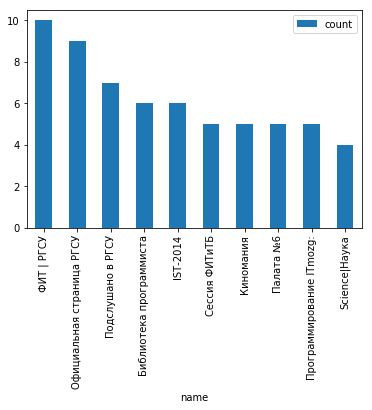

In [156]:
# выводим топ 10 на графике
top_group_selebrity.head(10).plot.bar(y ='count', x = 'name')

In [157]:
# сохраняем топ 100 в файл в формате json
myFile =  # пишем путь для сохранения в формате строки напр. '/Users/Anton/Desktop/python/net/top100.json'
with open(myFile, 'w', encoding="utf-8") as f:
    n = 0
    f.write('[' + '\n')
    for index in top_group_selebrity['id']:
        n+=1
        next_group = group_friends[index]
        if (n < 100):
            f.write('{"id" : "' + str(index) +'", "title" : "' + str(next_group['name']).replace('"', "'") + '", "count": "' + str(next_group['count']) + '"},'+ '\n')
        if (n == 100):
            f.write('{"id" : "' + str(index) +'", "title" : "' + str(next_group['name']).replace('"', "'") + '", "count": "' + str(next_group['count']) + '"}'+ '\n')
            f.write(']')
            break

In [158]:
# подготавливаем json для вывода статистики по группам
def get_info_user(access_token, id_need_percon):
    params_for_inf_about_person = {'access_token': access_token,
                                   'user_ids' : id_need_percon,
                                   'fields' : 'sex, bdate',
                                   'v': VERSION}

    response_need_person = requests.get('https://api.vk.com/method/users.get', params_for_inf_about_person)
    try:
        info_need_person = response_need_person.json()['response'][0]
    except KeyError:
        info_need_person = get_info_user(access_token, id_need_percon)
    return info_need_person

info_about_person = {}
count_group = 0
for id_group in top_group_selebrity['id'].head(5):
    next_group = group_friends[id_group]
    count_group += 1
    sex = {}
    sexm = 0
    sexw = 0
    bdate = {}
    bdate_10 = 0
    bdate_17 = 0
    bdate_23 = 0
    bdate_35 = 0
    bdate_36 = 0
    
    for id_need_percon in group_friends[id_group]['id_user']:
        info_need_person = get_info_user(access_token, id_need_percon)
        try:
            if(info_need_person['sex'] == 2):
                sexm += 1
            else:
                sexw += 1
                
            try:
                dat_birthday = info_need_person['bdate'].split('.')
                delt_time = datetime.datetime.now() - datetime.datetime(int(dat_birthday[2]), int(dat_birthday[1]), int(dat_birthday[0]))                                                                                       
                years = math.floor(delt_time.days/365)

                if(years <= 10):
                    bdate_10 += 1
                elif(10 < years < 18):
                    bdate_17 += 1
                elif(18 <= years < 24):
                    bdate_23 += 1
                elif(24 <= years <36):
                    bdate_35 += 1
                elif(36 <= years):
                    bdate_36 += 1
            except IndexError:
                pass
            except ValueError:
                pass
                                                                        
        except KeyError:
            pass
        
    sex = {'sexm': sexm, 'sexw': sexw}
    bdate = {'0-10': bdate_10, '11-17': bdate_17, '18-23': bdate_23, '24-35': bdate_35, '36-...': bdate_36}
    info_about_person[count_group] = {'id' : id_group, 'sex': sex, 'bdate': bdate, 'name' : next_group['name']}

ФИТ | РГСУ


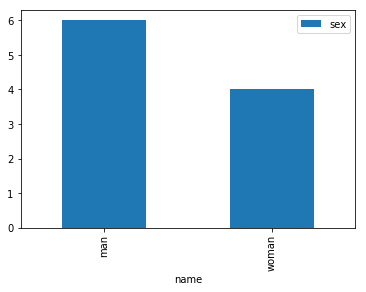

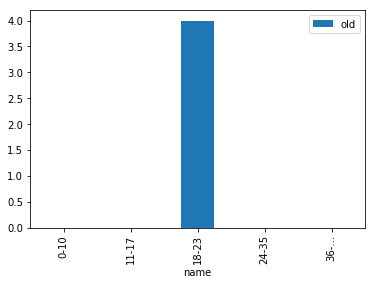

In [161]:
# выводим статистику по первой группе
new_group = info_about_person[1]
    
print(new_group['name'])
sex_group = []
sex_group.append({'sex': new_group['sex']['sexm'], 'name' : 'man'})
sex_group.append({'sex' : new_group['sex']['sexw'], 'name' : 'woman'})

pd.DataFrame(sex_group).plot.bar(x ='name', y = 'sex', )

old_group = []
for key, old_stat in new_group['bdate'].items():
    old_group.append({'old': old_stat, 'name' : key})
pd.DataFrame(old_group).plot.bar(x ='name', y = 'old')

Официальная страница РГСУ


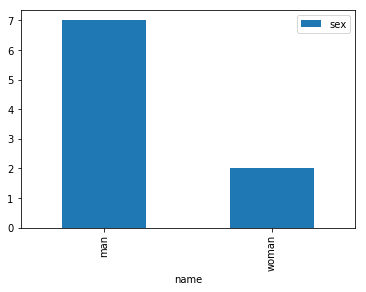

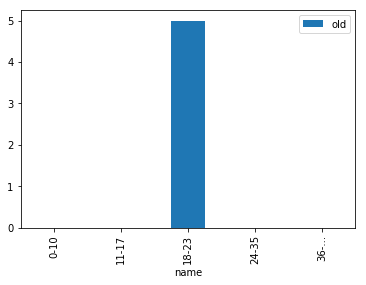

In [162]:
# выводим статистику по второй группе
new_group = info_about_person[2]
    
print(new_group['name'])
sex_group = []
sex_group.append({'sex': new_group['sex']['sexm'], 'name' : 'man'})
sex_group.append({'sex' : new_group['sex']['sexw'], 'name' : 'woman'})

pd.DataFrame(sex_group).plot.bar(x ='name', y = 'sex', )

old_group = []
for key, old_stat in new_group['bdate'].items():
    old_group.append({'old': old_stat, 'name' : key})
pd.DataFrame(old_group).plot.bar(x ='name', y = 'old')

Подслушано в РГСУ


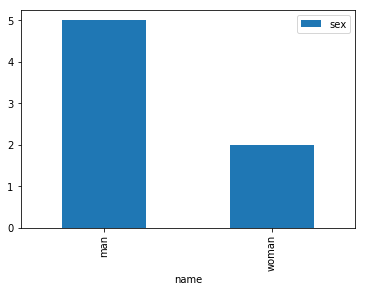

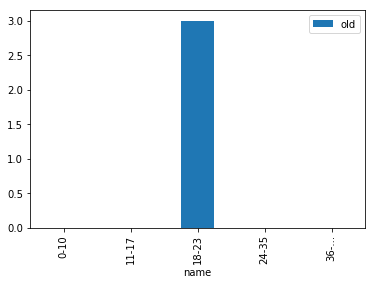

In [163]:
# выводим статистику по третьей группе
new_group = info_about_person[3]
    
print(new_group['name'])
sex_group = []
sex_group.append({'sex': new_group['sex']['sexm'], 'name' : 'man'})
sex_group.append({'sex' : new_group['sex']['sexw'], 'name' : 'woman'})

pd.DataFrame(sex_group).plot.bar(x ='name', y = 'sex', )

old_group = []
for key, old_stat in new_group['bdate'].items():
    old_group.append({'old': old_stat, 'name' : key})
pd.DataFrame(old_group).plot.bar(x ='name', y = 'old')

{'id': 54530371, 'sex': {'sexm': 5, 'sexw': 1}, 'bdate': {'0-10': 0, '11-17': 0, '18-23': 2, '24-35': 0, '36-...': 1}, 'name': 'Библиотека программиста'}
Библиотека программиста


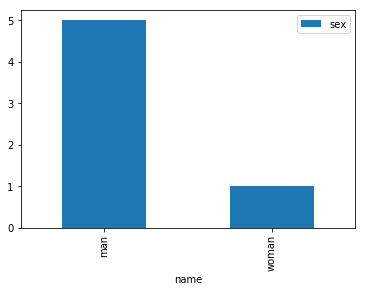

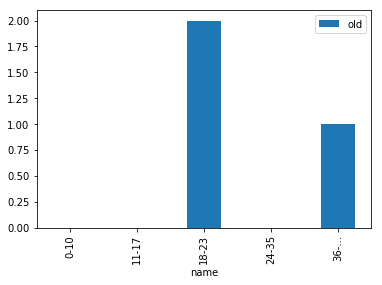

In [164]:
# выводим статистику по четвертой группе

new_group = info_about_person[4]
print(new_group)    
print(new_group['name'])
sex_group = []
sex_group.append({'sex': new_group['sex']['sexm'], 'name' : 'man'})
sex_group.append({'sex' : new_group['sex']['sexw'], 'name' : 'woman'})

pd.DataFrame(sex_group).plot.bar(x ='name', y = 'sex', )

old_group = []
for key, old_stat in new_group['bdate'].items():
    old_group.append({'old': old_stat, 'name' : key})
pd.DataFrame(old_group).plot.bar(x ='name', y = 'old')

IST-2014


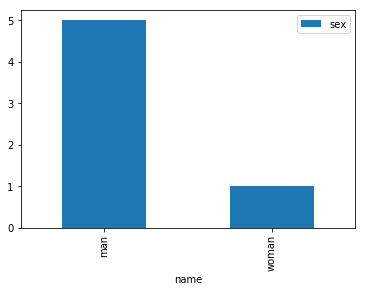

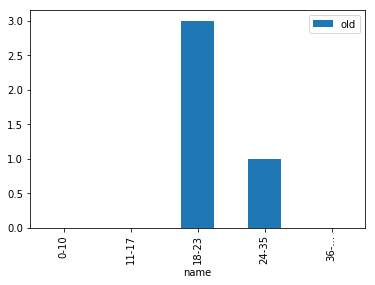

In [165]:
# выводим статистику по пятой группе
new_group = info_about_person[5]
    
print(new_group['name'])
sex_group = []
sex_group.append({'sex': new_group['sex']['sexm'], 'name' : 'man'})
sex_group.append({'sex' : new_group['sex']['sexw'], 'name' : 'woman'})

pd.DataFrame(sex_group).plot.bar(x ='name', y = 'sex', )

old_group = []
for key, old_stat in new_group['bdate'].items():
    old_group.append({'old': old_stat, 'name' : key})
pd.DataFrame(old_group).plot.bar(x ='name', y = 'old')